# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
stock_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab/prices.csv')

## Question 2

### Drop null
- Drop null values if any

In [ ]:
if (stock_df.isna().sum().sum() > 0):
  stock_df.dropna(inplace = True)

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [ ]:
stock_df.drop(["date","symbol","volume"], axis =1, inplace = True)

## Question 3

### Print the dataframe
- print the modified dataframe

In [ ]:
stock_df

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002
...,...,...,...,...
851259,103.309998,103.199997,102.849998,103.930000
851260,43.070000,43.040001,42.689999,43.310001
851261,53.639999,53.529999,53.270000,53.740002
851262,44.730000,45.450001,44.410000,45.590000


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [ ]:
y = stock_df["close"]
X = stock_df.drop(["close"],axis=1)

## Question 4

### Create train and test sets
- Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(681011, 3)

In [ ]:
X_test.shape

(170253, 3)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [ ]:
#Initialize Sequential model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(3,), activation='linear'))

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [ ]:
#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='mse')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data = (X_test,y_test), verbose = 1)

Epoch 1/50
5321/5321 [==============================] - 9s 2ms/step - loss: 36.5499 - val_loss: 1.0149
Epoch 2/50
5321/5321 [==============================] - 9s 2ms/step - loss: 0.9546 - val_loss: 0.9860
Epoch 3/50
5321/5321 [==============================] - 9s 2ms/step - loss: 0.9448 - val_loss: 0.9788
Epoch 4/50
5321/5321 [==============================] - 9s 2ms/step - loss: 0.9370 - val_loss: 0.9706
Epoch 5/50
5321/5321 [==============================] - 9s 2ms/step - loss: 0.9295 - val_loss: 1.0245
Epoch 6/50
5321/5321 [==============================] - 9s 2ms/step - loss: 0.9233 - val_loss: 0.9559
Epoch 7/50
5321/5321 [==============================] - 9s 2ms/step - loss: 0.9139 - val_loss: 0.9487
Epoch 8/50
5321/5321 [==============================] - 9s 2ms/step - loss: 0.9076 - val_loss: 0.9467
Epoch 9/50
5321/5321 [==============================] - 9s 2ms/step - loss: 0.9012 - val_loss: 0.9390
Epoch 10/50
5321/5321 [==============================] - 9s 2ms/step - loss: 0.89

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [ ]:
model.evaluate(X_test, y_test)

5321/5321 [==============================] - 6s 1ms/step - loss: 0.7169


0.7168856859207153

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [ ]:
import numpy as np
input_data = np.expand_dims([123.430000, 122.30999, 116.250000], axis = 0)
input_data.shape

(1, 3)

In [ ]:
model.predict(sc.transform(input_data))

array([[119.67562]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [ ]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

### Change train and test labels into one-hot vectors

In [ ]:
print(trainX.shape)
print(testX.shape)
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [ ]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [ ]:
#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(200, activation = 'relu'))
model2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model2.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [ ]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
#Compile the model
model2.compile( optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 784)               3136      
_________________________________________________________________
dense_49 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_50 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
___________________________________________

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_v1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32, 
          callbacks=[model_checkpoint])

Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.5116 - accuracy: 0.8160
Epoch 00001: val_accuracy improved from -inf to 0.83780, saving model to mnist_v1.h5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5113 - accuracy: 0.8161 - val_loss: 0.4220 - val_accuracy: 0.8378
Epoch 2/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.3955 - accuracy: 0.8544
Epoch 00002: val_accuracy improved from 0.83780 to 0.86120, saving model to mnist_v1.h5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3954 - accuracy: 0.8544 - val_loss: 0.3812 - val_accuracy: 0.8612
Epoch 3/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.3604 - accuracy: 0.8672
Epoch 00003: val_accuracy improved from 0.86120 to 0.86750, saving model to mnist_v1.h5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3605 - accuracy: 0.8671 - val_loss: 0.3780 - val_accuracy: 0.8675
Epoch 4/10
1872/1875 [========================

In [ ]:
!ls -l

total 2164
drwx------ 5 root root    4096 Nov 22 03:51 drive
-rw-r--r-- 1 root root 2204320 Nov 22 07:10 mnist_v1.h5
drwxr-xr-x 1 root root    4096 Nov 13 17:33 sample_data


In [ ]:
model2.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 784)               3136      
_________________________________________________________________
dense_49 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_50 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
___________________________________________

Prediction label 5
Actual Label 5


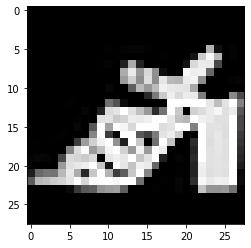

In [ ]:
img_num = np.random.randint(0,testX.shape[0])
input_data = np.expand_dims(testX[img_num], axis=0)
pred = model2.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
print('Actual Label', np.argmax(testY[img_num]))
plt.imshow(testX[img_num],cmap='gray')
plt.show()